# E-commerce data analysis
### Retailrocket recommender system dataset

Author: Karsenbay Aibat

----
***Data***:  
The behaviour data from 2015-05-03 to 2015-09-18 to, i.e. events like clicks, add to carts, transactions, represent interactions that were collected over a period of 4.5 months  

***Four csv files***:  
```
events.csv                  |  2756102 rows                          |  89.8 MB  
item_properties_part1.csv   |  11000000 rows                         |  461 MB  
item_properties_part2.csv   |  9275904 rows                          |  389 MB   
category_tree.csv           |  1670 rows                             |  14.1 KB  
```

The data has been collected from a real-world ecommerce website. It is raw data, i.e. without any content transformations, however, all values are hashed due to confidential issues  

Dataset link: https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset?select=events.csv  

## Events Sample

| timestamp      | visitorid | event | itemid | transactionid |
|----------------|-----------|-------|--------|---------------|
| 1433221332117  | 257597    | view  | 355908 |               |
| 1433224214164  | 992329    | view  | 248676 |               |
| 1433221999827  | 111016    | view  | 318965 |               |
| 1433221955914  | 483717    | view  | 253185 |               |
| 1433221337106  | 951259    | view  | 367447 |               |
| 1433224086234  | 972639    | view  | 22556  |               |
| 1433221923240  | 810725    | view  | 443030 |               |
| 1433223291897  | 794181    | view  | 439202 |               |
| 1433220899221  | 824915    | view  | 428805 |               |


## Item Properties Sample

| timestamp      | itemid | property   | value                          |
|----------------|--------|------------|--------------------------------|
| 1435460400000  | 460429 | categoryid | 1338                           |
| 1441508400000  | 206783 | 888        | 1116713 960601 n277.200        |
| 1439089200000  | 395014 | 400        | n552.000 639502 n720.000 424566|
| 1431226800000  | 59481  | 790        | n15360.000                     |
| 1431831600000  | 156781 | 917        | 828513                         |
| 1436065200000  | 285026 | available  | 0                              |
| 1434250800000  | 89534  | 213        | 1121373                        |
| 1431831600000  | 264312 | 6          | 319724                  m       |
| 1433646000000  | 229370 | 202        | 1330310                        |


## Category Tree Sample

| categoryid | parentid |
|------------|----------|
| 1016       | 213      |
| 809        | 169      |
| 570        | 9        |
| 1691       | 885      |
| 536        | 1691     |
| 231        |          |
| 542        | 378      |
| 1146       | 542      |
| 1140       | 542      |



# Analysis Provided

----
#### Sales Conversion Rate 
Sales Conversion Rate = (Number of Conversions / Total Number of Leads or Visitors) x 100 

#### Repeat/returning customer rate 
Customers who made two or more purchases / Total customers x 100

#### Website Traffic  
Number of visits to a website, as well as visitor quality

#### Add-to-Cart Rate  
Website sessions where visitor adds products to cart in a specific period / Total sessions during that period x 100

#### Cart Abandonment Rate  
1 – (Completed purchases / Carts created) × 100

#### Average Order Value 
Total revenue / Number of orders

#### Monthly recurring revenue (MRR)
Total revenue from paying customers in a given month

###### New MRR = Total number of new customers in a month x Revenue brought in by new customers in month
###### Expansion MRR = Total number of customers who upgraded in a month x (New revenue - Old revenue)
###### Churn MRR = Total number of customers who canceled or downgraded x Lost revenue
###### Net MRR Growth = Expansion MRR + Churn MRR
###### ARPA = MRR / Total number of customers in that month



#### Customer Retention Rate
(Customers at end of period – New customers) / Customers at beginning of period × 100

----

Now let's create tables and import the data in SQL

In [ ]:
CREATE TABLE item_properties(
	timestamp BIGINT,
	item_id INT,
	property TEXT,
	value TEXT
);

CREATE TABLE events(
	timestamp BIGINT,
	visitor_id INT,
	event TEXT,
	item_id INT,
	transaction_id INT
);

CREATE TABLE category_tree(
	category_id INT,
	parent_id INT
)

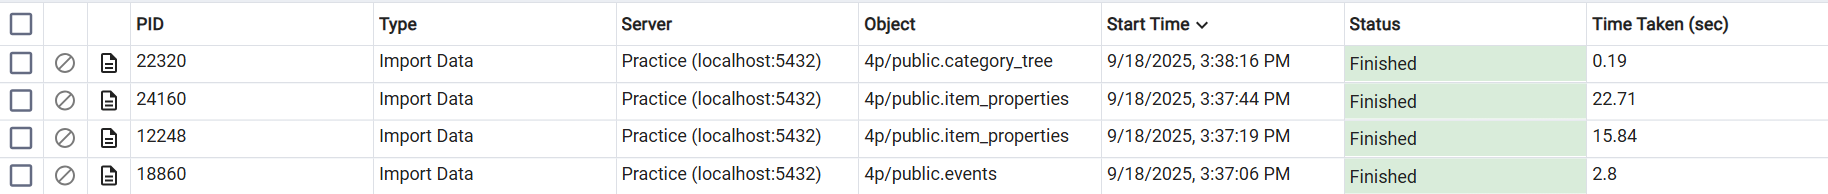  

### First metric:  
#### Sales Conversion Rate  
_Total transactions / Total visits x 100_

In [ ]:
SELECT 
  ROUND(
    COUNT(DISTINCT visitor_id) FILTER (WHERE transaction_id IS NOT NULL)::NUMERIC
    / COUNT(DISTINCT visitor_id) * 100,
    4
  ) AS Sales_Conversion_Rate
FROM events;


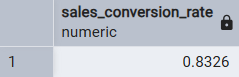

_Query complete 00:00:01.093_

By months:

In [ ]:
SELECT 
  EXTRACT(MONTH FROM to_timestamp(timestamp / 1000)::date) AS month,
  ROUND(
    COUNT(DISTINCT visitor_id) FILTER (WHERE transaction_id IS NOT NULL)::NUMERIC
    / COUNT(DISTINCT visitor_id) * 100,
    4
  ) AS Sales_Conversion_Rate
FROM events
GROUP BY 1
ORDER BY 1;

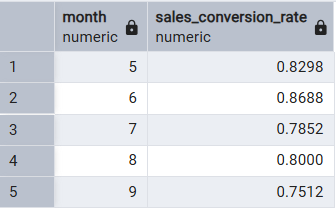

_Query complete 00:00:01.103_

With the knowledge that sales conversation rate is only 0.8326%, i can assume that most of the consumers dont reach the final stage of purchasing. Instead something stops them. The reasons may be diverce. Percent being that low is not surprising in e commerce field, but it can be much higher. Next metrics will help me to understand the problem better. Repeat customer rate will tell me is there problem specifically in product that people are not satisfied with

I will compare retailrocket data with the average rates in e commerce. Average rates will be taken from Dinamic Yield. Dynamic Yield is owned by Mastercard and provides conversion rates for medium to large brands aggregated across 200M+ monthly unique users from 400+ brands, collected over 300M+ total sessions

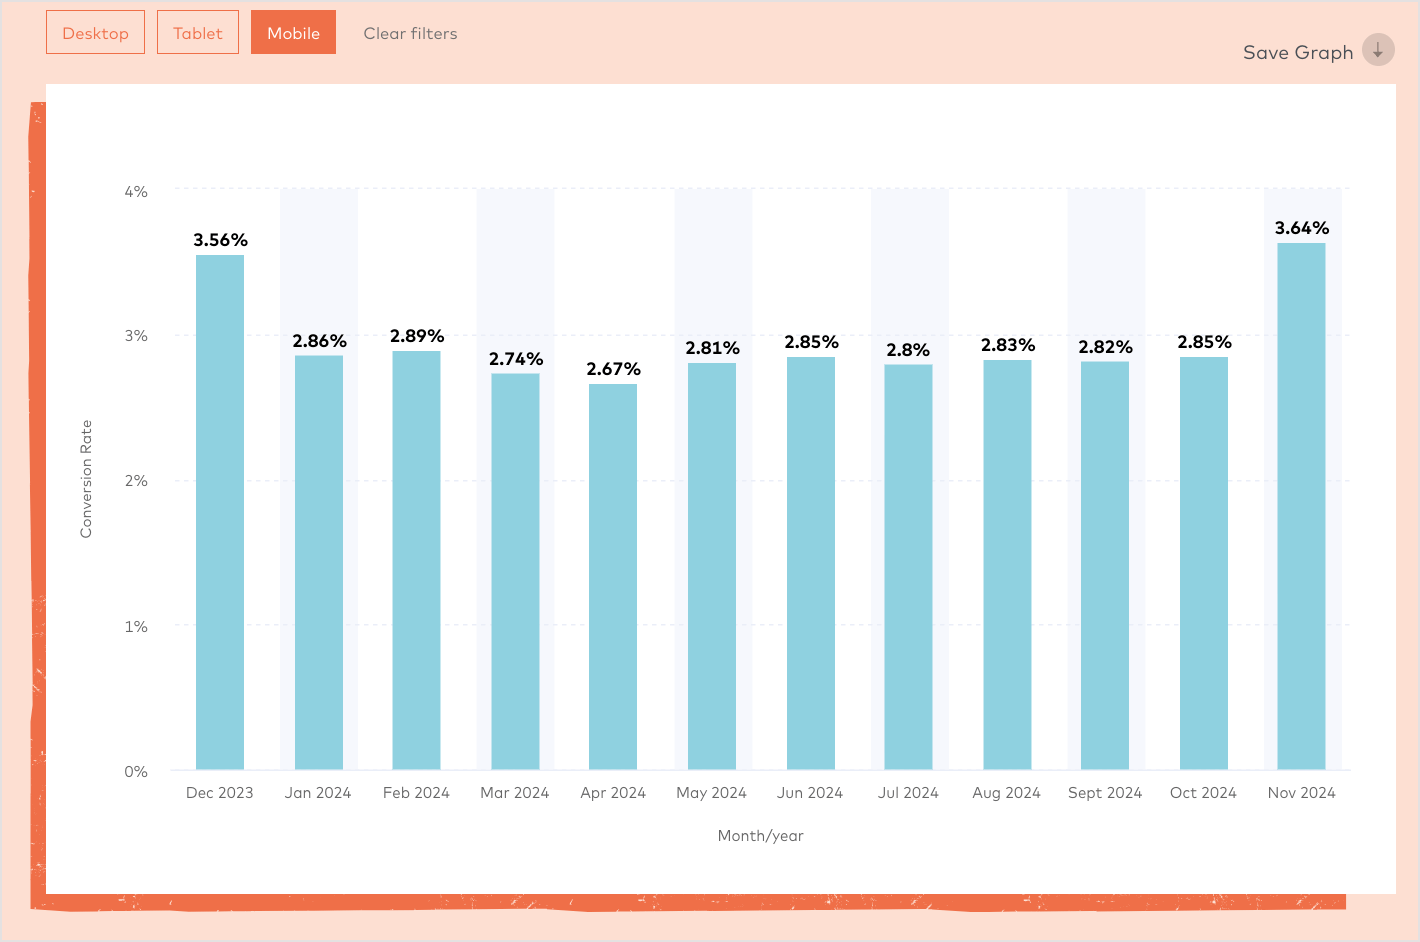

Overall average converation rate is 2.9%. Our company has 0.83%. We can set up a goal to reach at least 1% to keep up with market

## Second metric:
##### Repeat/returning customer rate  
_Customers who made two or more purchases / Total customers x 100_

In [ ]:
SELECT 
ROUND((SELECT count(visitor_id) FROM
(SELECT visitor_id FROM events
WHERE event LIKE '%transaction%'
GROUP BY 1
HAVING count(visitor_id) >= 2))::NUMERIC / count(visitor_id) * 100, 6) AS Returning_Customer_Rate FROM events

Outcome:  
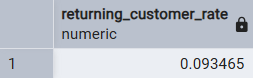  
_Query complete 00:00:00.375_

The result showcases wonderful result. Sales converstaion rate is 6x bigger than returning customer rate. I can assume that the problem may be in the product or in the discount/loyalty programs. Implementing new loyalty programs and making returning to the company serve to the customer benefits. Testing the product quality and probably fixing it will make the customers come back. Continuing this journey we can segment this metric into months to expand our vision

In [ ]:
SELECT  EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) AS month,
ROUND((SELECT count(visitor_id) FROM
(SELECT visitor_id FROM events
WHERE event LIKE '%transaction%'
GROUP BY 1
HAVING count(visitor_id) >= 2))::NUMERIC / count(visitor_id) * 100, 6) AS Returning_Customer_Rate FROM events
GROUP BY 1
ORDER BY 1

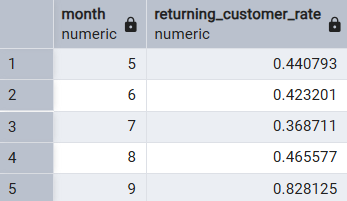

_Query complete 00:00:00.834_

 We can see that it starts great in may but start to fall at the start of the summer. September is so high because the data include only the part of september The lowest peak is july, the middle of the summer. Probably something happened in the may-june. Most likely new promotion didnt work or discounts or product quality fall a lot. To be sure what it is exactly i will compare returning customer rate and sales converation rate by months to showcase the reason why it fall

In [ ]:
SELECT EXTRACT(MONTH FROM to_timestamp(timestamp/1000):: date) AS month, ROUND(
    (SELECT count(DISTINCT transaction_id) FROM events
WHERE transaction_id IS NOT NULL)::numeric / count(*), 6) * 100 AS Sales_Conversion_Rate
FROM events
GROUP BY 1
ORDER BY 1

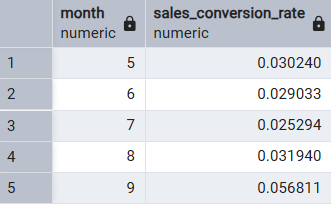

_Query complete 00:00:00.667_

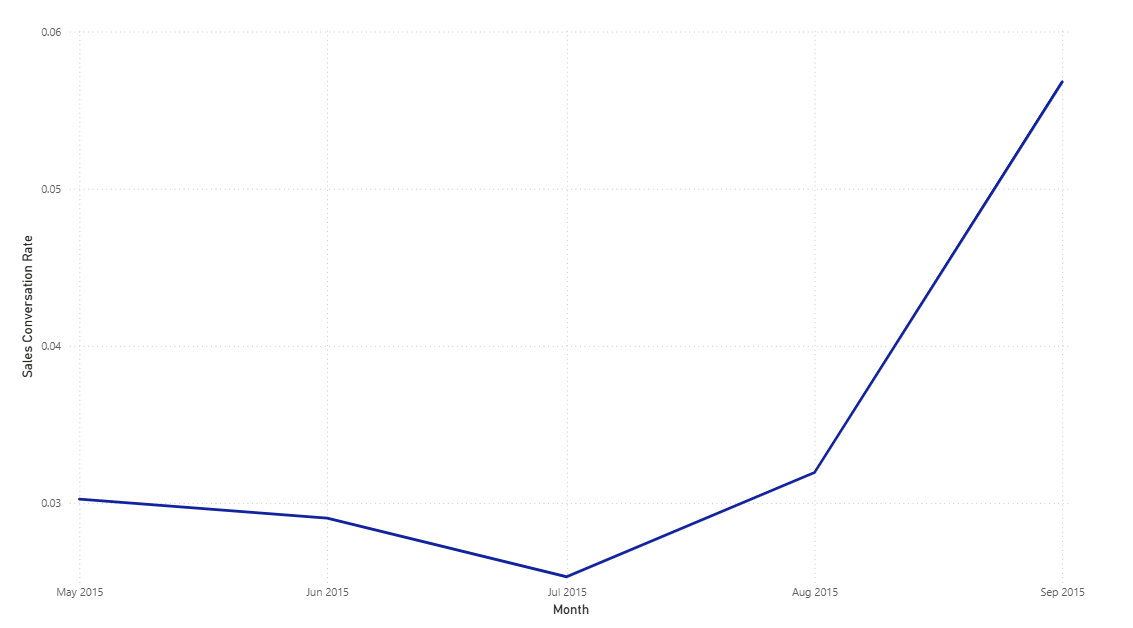

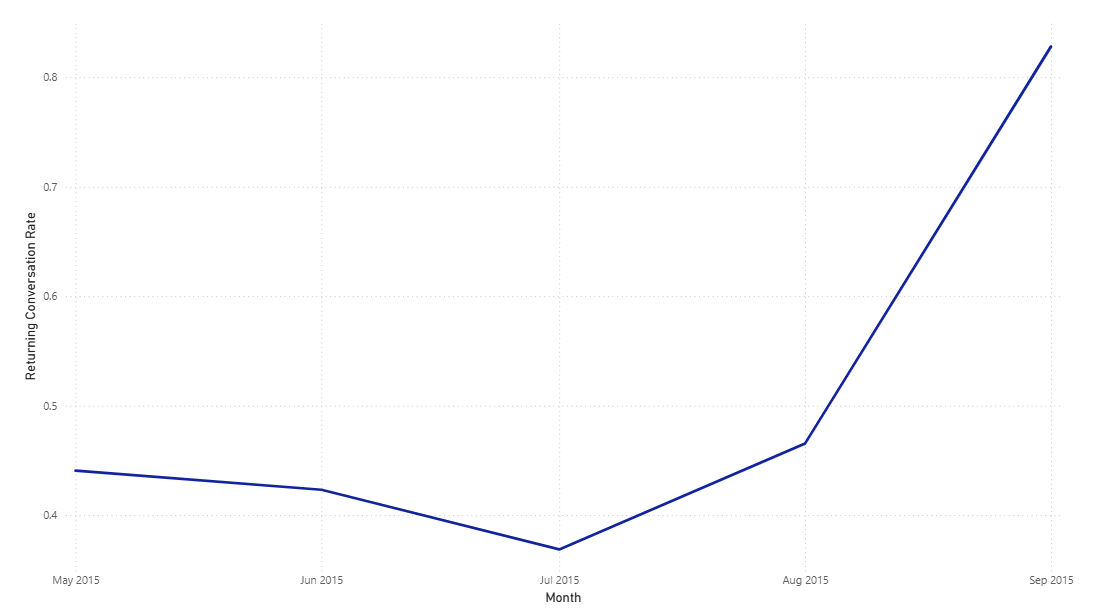

_Query complete 00:00:00.603_

The similarity is obvious, both of them falls in june. Looks like june was downgrade of the product quality and there was logistic issues, such as transportation, purchasing and etc. But in the august this issues must been solved and it september it flies high. The data is up to 18 september, so it come over through the half of the month. One more reason can be seasonal changes, when with the end of the summer everyone has the need to buy something. Next metric will show which customers come back and their quality. Witnessing this information will show the growth/fall of the customers that we can tie with the sales/return rates

## Third metric:  
##### Website Traffic / Quality  
_Number of visits to a website, as well as visitor quality_

In [ ]:
# Firstly find 100 percent of actions
SELECT visitor_id, count(event) AS "100"
FROM events
GROUP BY 1

# Then find high quality actions
SELECT visitor_id, count(event) AS high_q
FROM events
WHERE event NOT LIKE 'view' 
GROUP BY 1
_______________________________________________________________________________________________________________________________________________________

SELECT e.visitor_id, h.hu AS actions, COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) AS quality_percent from events AS e

LEFT JOIN (SELECT visitor_id, count(event) AS hu
FROM events
GROUP BY 1) AS h ON e.visitor_id = h.visitor_id 

LEFT JOIN (SELECT visitor_id, count(event) AS high_q
FROM events
WHERE event LIKE 'transaction'
GROUP BY 1) AS v ON e.visitor_id = v.visitor_id

GROUP BY e.visitor_id, h.hu, v.high_q
ORDER BY 1

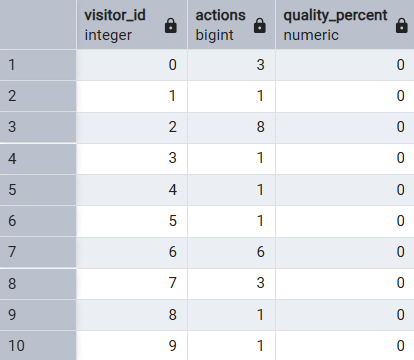

_Total Rows: 1407580 | Query Complete 00:00:07.805_

And the 0 quality percent filtered out

In [ ]:
SELECT e.visitor_id, h.hu AS actions, COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) AS quality_percent from events AS e

LEFT JOIN (SELECT visitor_id, count(event) AS hu
FROM events
GROUP BY 1) AS h ON e.visitor_id = h.visitor_id 

LEFT JOIN (SELECT visitor_id, count(event) AS high_q
FROM events
WHERE event LIKE 'transaction'
GROUP BY 1) AS v ON e.visitor_id = v.visitor_id

GROUP BY e.visitor_id, h.hu, v.high_q
having COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) != 0
ORDER BY 1

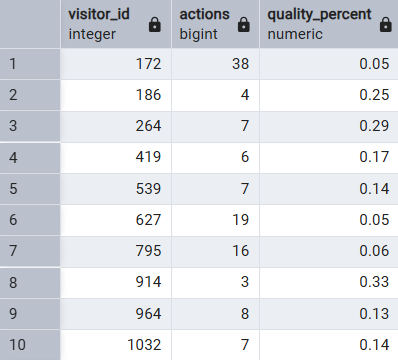

_Total Rows: 11709 | Query Complete: 00:00:04.649_

In [ ]:
SELECT EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date), sum(actions) as actions, sum(quality_percent) as quality, count(visitor_id) AS visitors FROM(
SELECT e.timestamp, e.visitor_id, h.hu AS actions, COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) AS quality_percent from events AS e

LEFT JOIN (SELECT visitor_id, count(event) AS hu
FROM events
GROUP BY 1) AS h ON e.visitor_id = h.visitor_id 

LEFT JOIN (SELECT visitor_id, count(event) AS high_q
FROM events
WHERE event LIKE 'transaction'
GROUP BY 1) AS v ON e.visitor_id = v.visitor_id

GROUP BY e.timestamp, e.visitor_id, h.hu, v.high_q
having COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) != 0
ORDER BY 1)
GROUP BY 1
ORDER BY 1

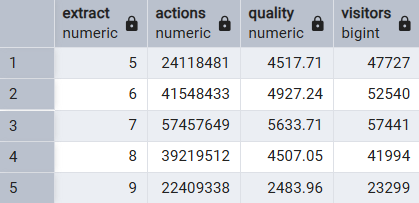

_Query complete 00:00:04.884_

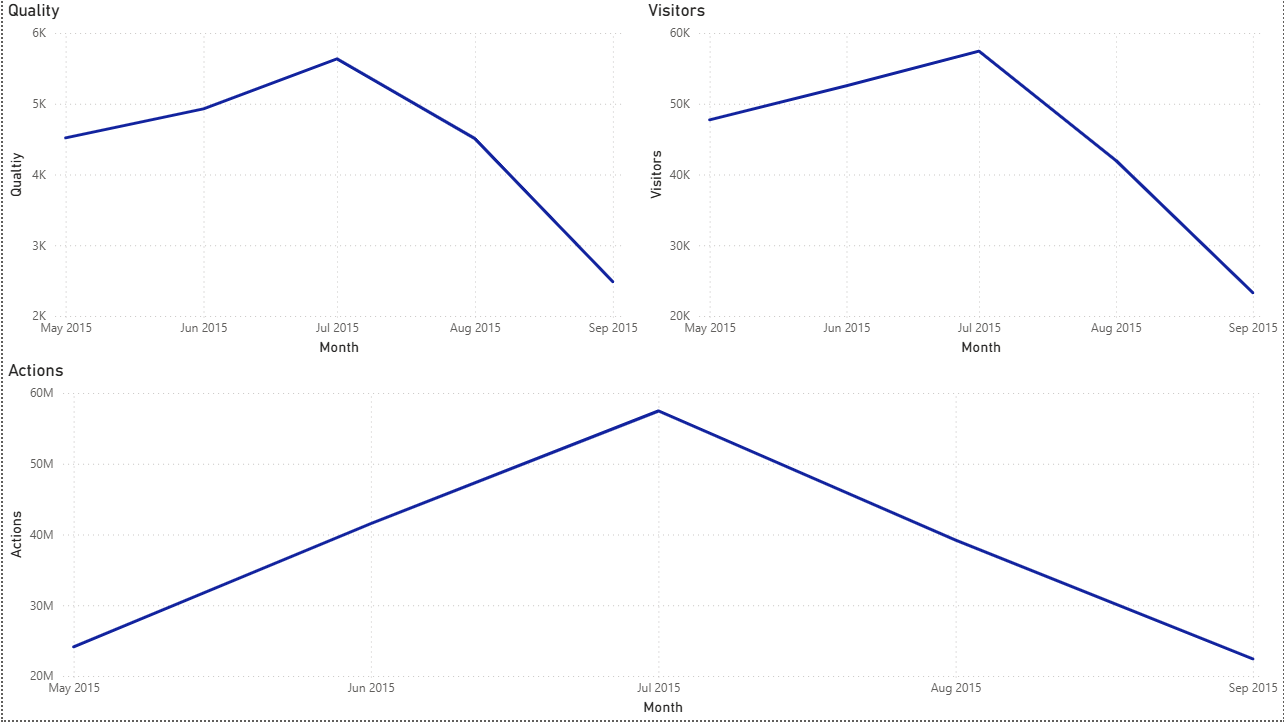

This is incredible result. It fully inverts our perception. June-July wasn't bad, but great. The growth was significant, but in august it falls down. number of actions, quality and visitors growth together. Which showcases great marketing/sales strategy and the fall of return/sales rate is related with that, because the general amount of visitors had grown and it affect the previous rates. And it partially explains significant growth in september, due to less amount of visitors of unfull month. But there must been a great discount/actions taken by the company that had increased the product qualtiy or provided good benefits for customers. Next metric will show the stage where customers tend to stop

## Fourth Metric:
##### Add-to-Cart Rate  
_Website sessions where visitor adds products to cart in a specific period / Total sessions during that period x 100_

In [ ]:
SELECT ROUND(sum(add_to_cart_rate)::numeric / count(*), 6) * 100 AS add_to_cart FROM
(SELECT visitor_id, MAX(CASE WHEN event LIKE 'addtocart' THEN 1 ELSE 0 END) AS Add_to_Cart_Rate 
FROM events
GROUP BY visitor_id
ORDER BY 1)

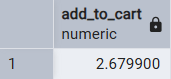

_Query Complete 00:00:01.262_

By months:

In [ ]:
SELECT EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) AS month, ROUND(COUNT(DISTINCT CASE WHEN event = 'addtocart' THEN visitor_id END)::numeric / count(DISTINCT visitor_id) * 100, 6) AS Add_to_Cart_Rate 
FROM events
GROUP BY EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date)
ORDER BY 1

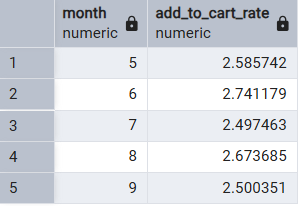

_Query complete 00:00:02.657_

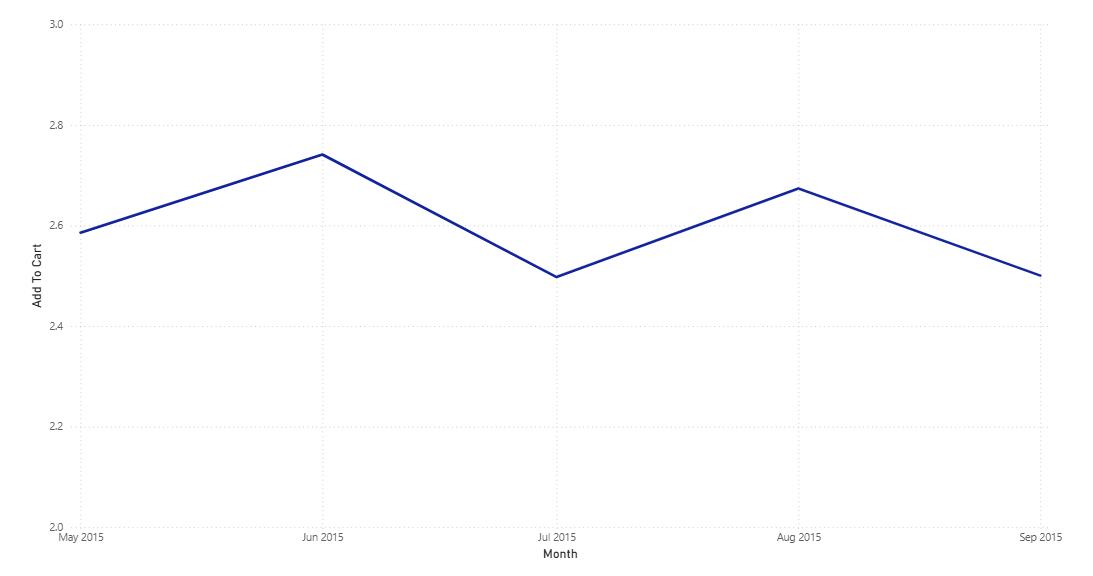

The graph is stable in fomr of waves. This can mean either good signs or bad. Good ones can be:
Successfull discount/promotion in each 2 months
Stability of customers

Bad ones:
Rate does not grow
Shopping Carting - Using cart as wishlist or to check the price with the delivery

To define which one is in your case we can compare it with the sales conversation rate

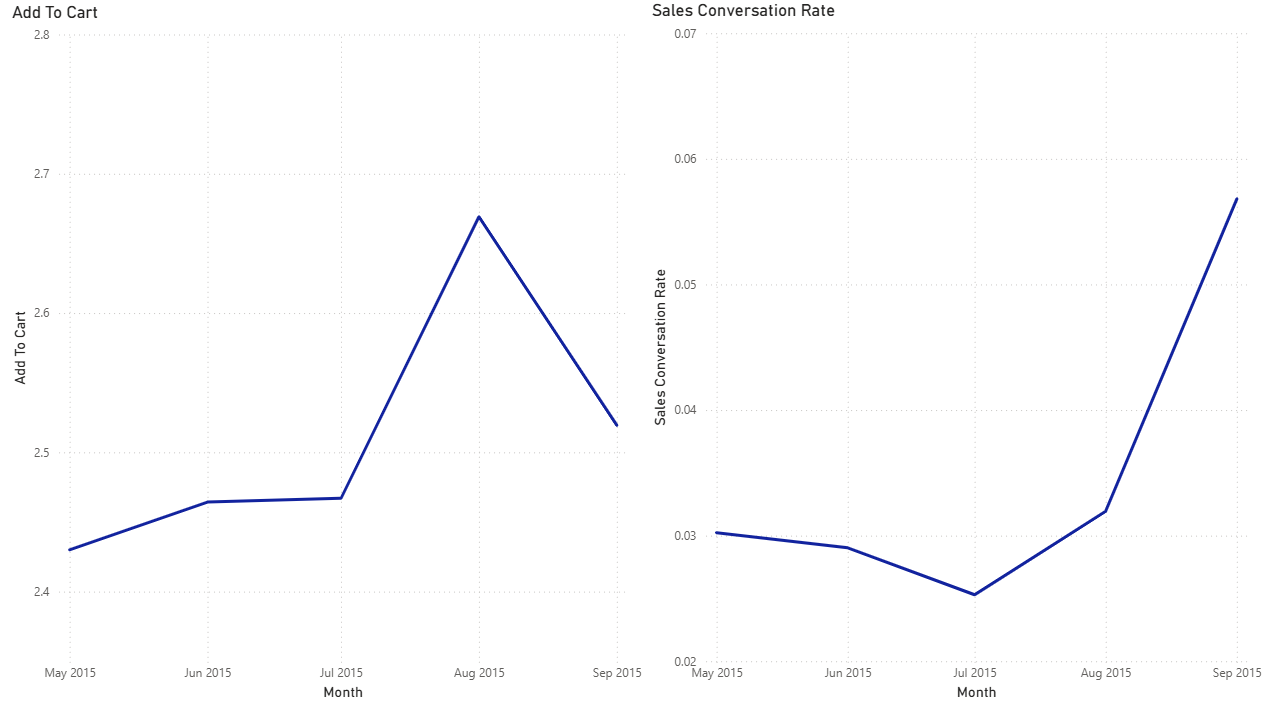

The both of them are increasing in august. But sales conversation rate keeps raising while add to cart comes back to previous status. This means that the checkout stage become easier, decreased the amount of products that do not require choice. The amount of accident customers decreases, while the amount of targeted customers increased. If the company continues with this position the sales conversation rate 1, while add to cart can still stay stable. To check the quality of this add to cart sessions i will find cart abandonment rate

Now to set up a goal, lets take a look at the average values in the field. Average add to cart rate in e commerce for mobile devices(75%)

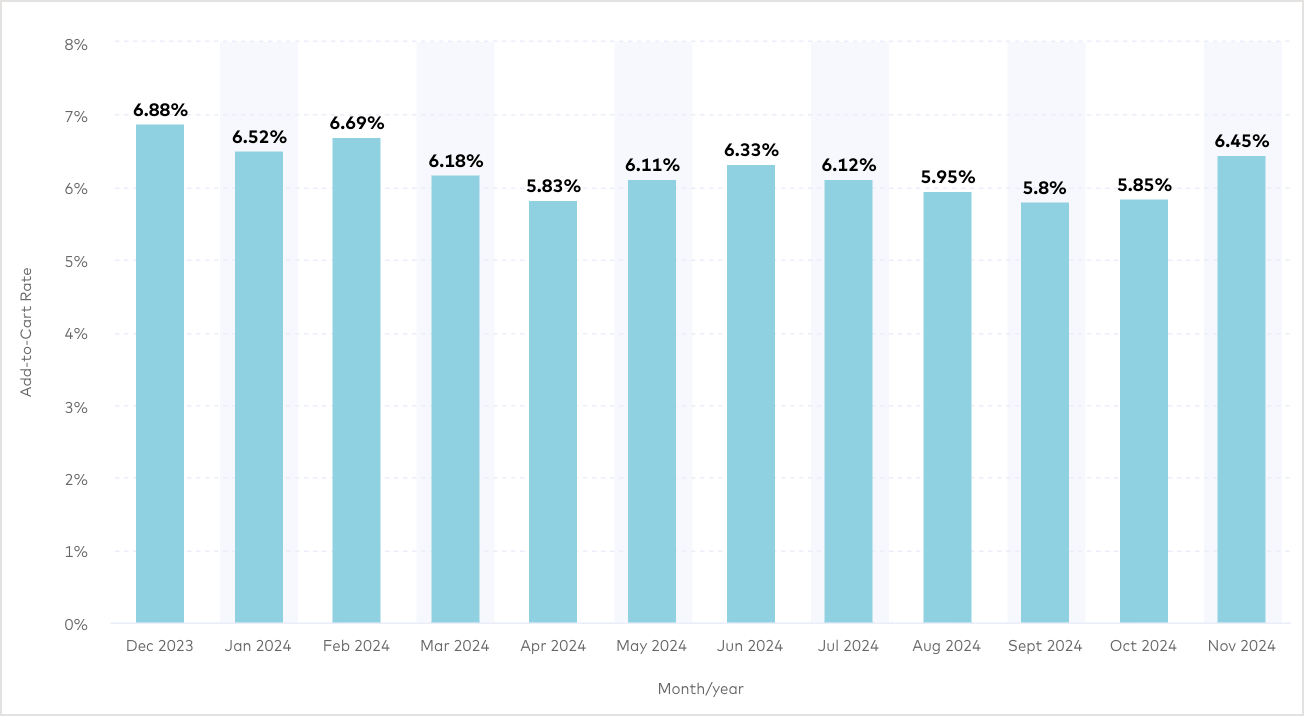

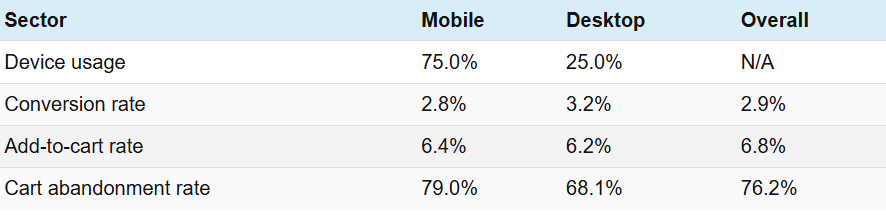

Overall add to cart rate is 6.8%, a stable level. In our case we have 2.67%, that is below average by far. To enchance add to cart rate the company can look at the UX and website involvement. So the goal for this metric will be

## Fifth Metric:
##### Cart Abandonment Rate (Proxy metric due to the absence of the checkout)  
_1 – (Completed purchases / Carts created) × 100_

In [ ]:
SELECT ROUND(1 - sum(CASE WHEN event LIKE 'transaction' THEN 1 ELSE 0 END)::numeric
/ sum(CASE WHEN event LIKE 'addtocart' THEN 1 ELSE 0 END)::numeric, 3) * 100 AS cart_abandonment_rate
FROM events

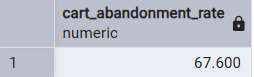

_Query Complete 00:00:00.189_

By months:

In [ ]:
SELECT EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) AS month, ROUND(1 - sum(CASE WHEN event LIKE 'transaction' THEN 1 ELSE 0 END)::numeric
/ sum(CASE WHEN event LIKE 'addtocart' THEN 1 ELSE 0 END)::numeric, 6) AS cart_abandonment_rate
FROM events
GROUP BY 1
ORDER BY 1

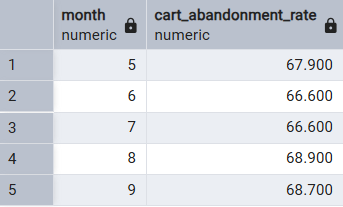

_Query complete 00:00:00.899_

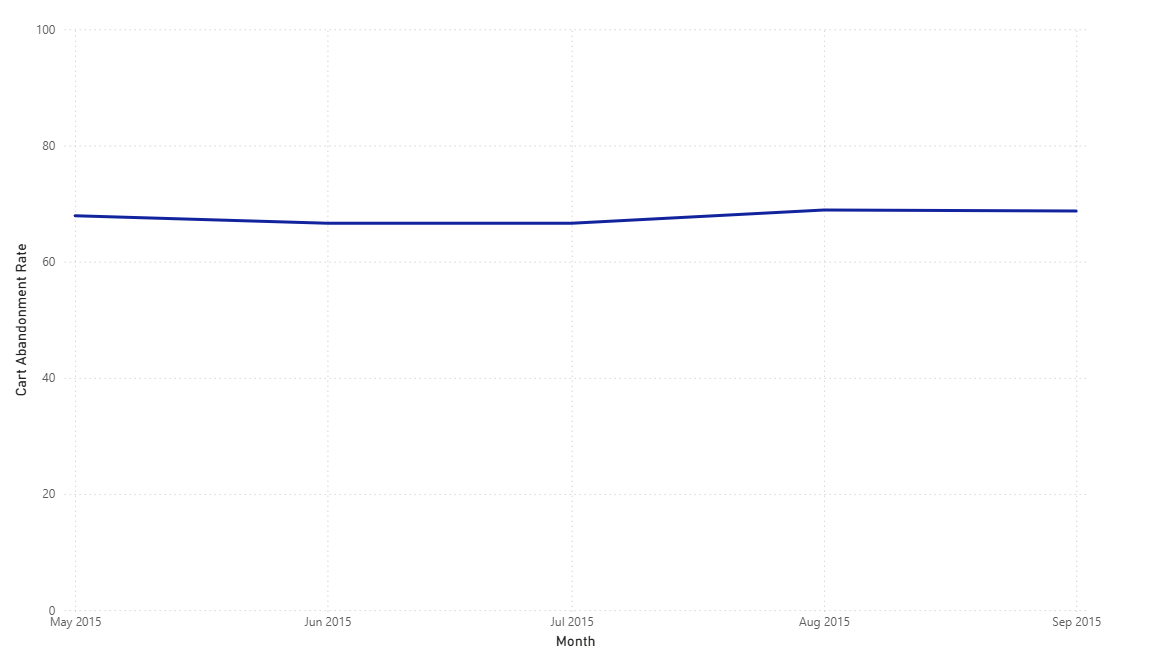

Cart abandonment rate is almost still, and do not follow add to cart rate. This means that people's behavior does not change after adding an item to their cart
  
Those who reach the shopping cart behave roughly the same each month
  
Changes occur before this step, at the level of motivation and interest in the product
  
In conclusion we can see that quality of the add to cart do not change, but the amount. Looks like there was successfull discount/promotion or seasonal change. Relauching or making new promotion like that will be a great idea to keep increasing add to cart rate/sales conversation rate

## Sixth Metric:
##### Average Order Value  
_Total revenue / Number of orders_

To calculate this metric i created a new column in item properties, because everything in this table is hashed. To reach prices of items i need to define which property is responsible for price. The only property where every row had n(all the numbers has n at the start) is 790. Time to create column price

In [ ]:
ALTER TABLE item_properties ADD COLUMN price DECIMAL(12, 2)

# And then insert price

UPDATE item_properties 
SET price = regexp_replace(value, 'n', '', 'g')::DECIMAL(12, 2)
WHERE property = '790'

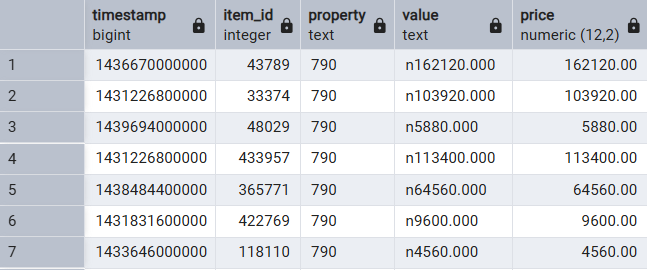

_Total rows: 25647450 | Query complete 00:00:09.757_

Now i need to find and filter out the last price change to get actual price. For this purpose i can use window function. Because right now i have multiple prices

In [ ]:
SELECT * FROM item_properties
WHERE property = '790'
ORDER BY item_id

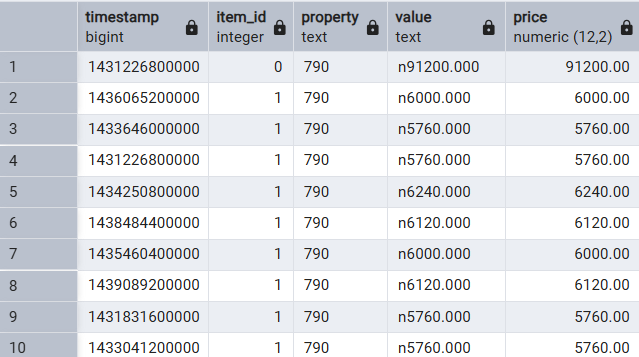

_Total rows: 1790516 | Query complete 00:00:02.903_

In [ ]:
SELECT * FROM (
SELECT *, ROW_NUMBER() OVER (PARTITION BY item_id ORDER BY timestamp DESC) FROM item_properties
WHERE property = '790')

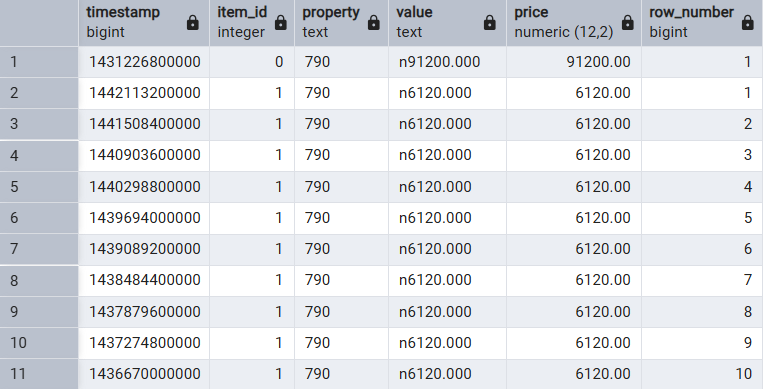

_Total rows: 1790516 | Query complete 00:00:03.105_

In [ ]:
# Join everything, fiter out only the rows where row number is 1 and creating view

CREATE VIEW transactions AS 
SELECT e.*, p.price FROM events AS e
JOIN (SELECT * FROM (
SELECT *, ROW_NUMBER() OVER (PARTITION BY item_id ORDER BY timestamp DESC) FROM item_properties
WHERE property = '790'
)
WHERE row_number = 1) AS p ON p.item_id = e.item_id
WHERE event = 'transaction'

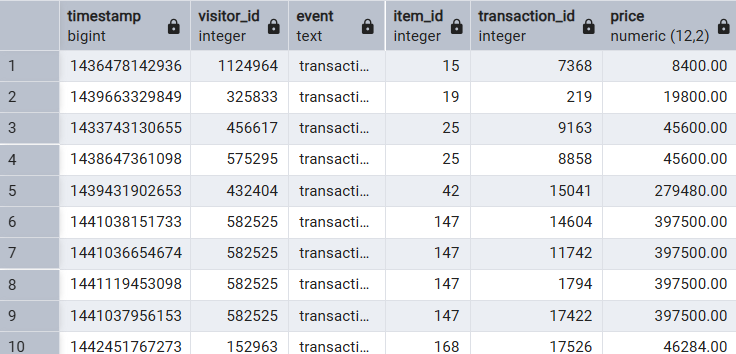

_Total rows: 21982 | Query complete 00:00:01.636_

It opens possibility to calculate average order value

In [ ]:
SELECT ROUND(sum(price) / count(*), 2) AS average_order_value FROM transactions

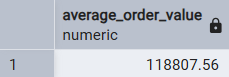

_Query complete 00:00:01.481_

## Seventh Metric:
##### Total revenue from paying customers in a given month(New MRR, Expansion MRR, Churn MRR, ARPA)  
_Total revenue from paying customers in a given month_
    
To calculate this metric i need date, because right now my timestamp is in UNIX code

In [ ]:
SELECT to_timestamp(timestamp / 1000)::date AS date, * FROM transactions

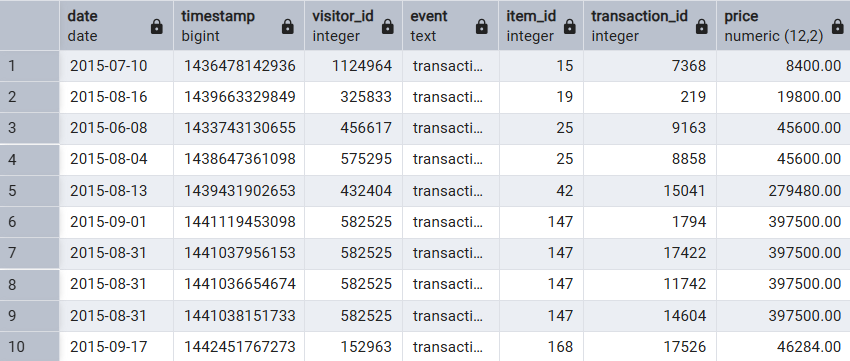

_Total rows: 21982 | Query complete 00:00:01.678_

The calculation from total revenue for each month:

In [ ]:
SELECT EXTRACT(MONTH FROM date) AS month, sum(price) FROM 
(SELECT to_timestamp(timestamp / 1000)::date AS date, * FROM transactions)
GROUP BY 1

![Screenshot 2025-09-30 154742.png](<attachment:Screenshot 2025-09-30 154742.png>)
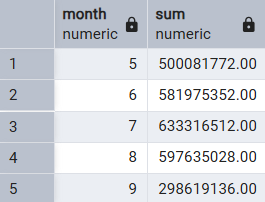

_Query complete 00:00:01.555_

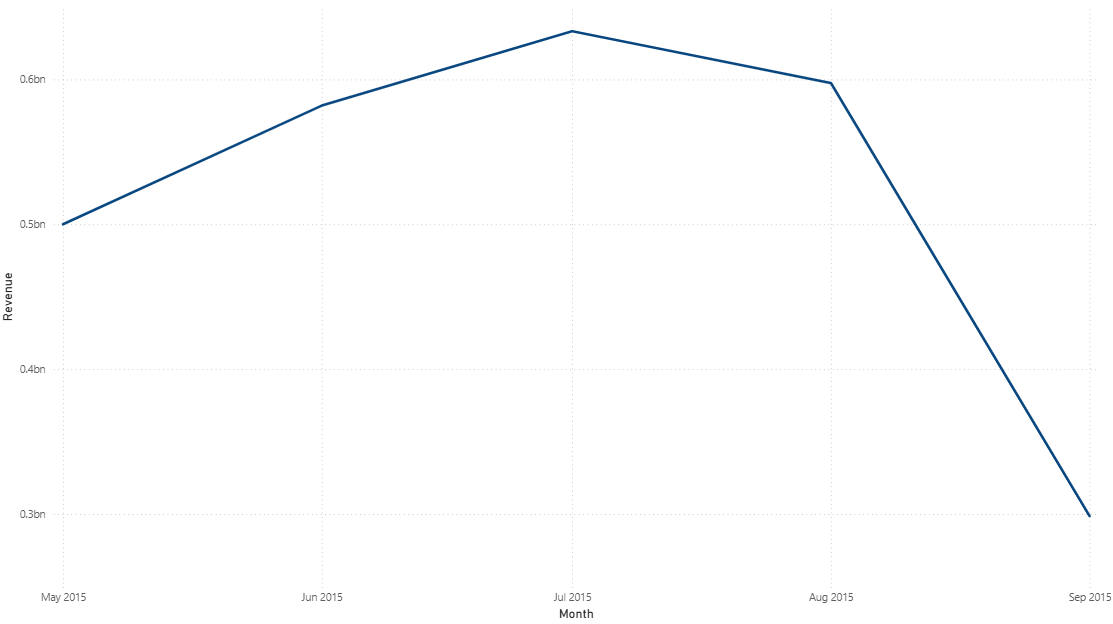

##### New MRR. Revegue gained from new customers  
_Total number of new customers in a month x Revenue brought in by new customers in month_

In [ ]:
SELECT month, count(visitor_id) AS new_visitors, sum(price) AS revenue FROM 
(SELECT EXTRACT(MONTH FROM g.date) AS month, g.visitor_id, sum(g.price) AS price 
FROM 
(SELECT to_timestamp(timestamp / 1000)::date AS date, *, ROW_NUMBER() OVER (PARTITION BY visitor_id ORDER BY timestamp) 
FROM transactions) AS g  

JOIN (
SELECT date, visitor_id FROM(
SELECT to_timestamp(timestamp / 1000)::date AS date, *, ROW_NUMBER() OVER (PARTITION BY visitor_id ORDER BY timestamp) 
FROM transactions) 
WHERE row_number = 1
) AS v ON v.visitor_id = g.visitor_id
WHERE EXTRACT(MONTH FROM g.date) = EXTRACT(MONTH FROM v.date)
GROUP BY 1, 2 
ORDER BY 1)
GROUP BY 1

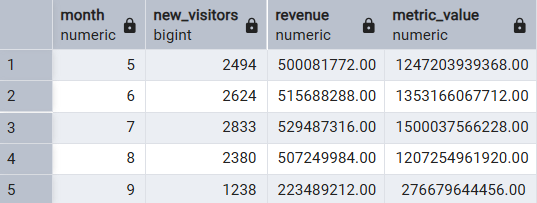

_Query complete 00:00:03.363_

##### Expansion MMR
_Total number of customers who upgraded in a month x (New revenue - Old revenue)_

From may to june:

In [ ]:
SELECT sum(june - may) AS Expansion_MMR, ROUND(sum(j.june) / sum(june - may), 2) AS percent
FROM 
(SELECT visitor_id, sum(price) AS may FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 5
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS june FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 6
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE j.june > m.may

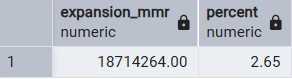

_Query complete 00:00:04.891_

From june to july:

In [ ]:
SELECT sum(july - june) AS Expansion_MMR, ROUND(sum(j.july) / sum(july - june), 2) AS percent
FROM 
(SELECT visitor_id, sum(price) AS june FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 6
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS july FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 7
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE j.july > m.june

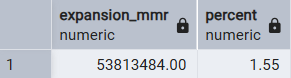

_Query complete 00:00:05.028_

From july to august:

In [ ]:
SELECT sum(august - july) AS Expansion_MMR, ROUND(sum(j.august) / sum(august - july), 2) AS percent
FROM 
(SELECT visitor_id, sum(price) AS july FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 7
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS august FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 8
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE j.august > m.july

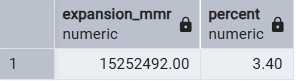

_Query complete 00:00:04.881_

From august to september:

In [ ]:
SELECT sum(september - august) AS Expansion_MMR, ROUND(sum(j.september) / sum(september - august), 2) AS percent
FROM 
(SELECT visitor_id, sum(price) AS august FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 8
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS september FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 9
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE j.september > m.august

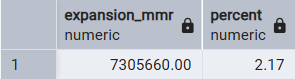

_Query complete 00:00:03.909_

##### Churn MMR  
_Total number of customers who canceled or downgraded x Lost revenue_  
  
For may to june:

In [ ]:
SELECT sum(june - may) AS churn_MMR, ABS(ROUND(sum(j.june) / sum(june - may), 2)) AS percent
FROM 
(SELECT visitor_id, sum(price) AS may FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 5
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS june FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 6
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE m.may > j.june

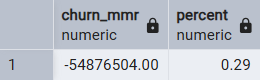

_Query complete 00:00:04.421_

From june to july:

In [ ]:
SELECT sum(july - june) AS Churn_MMR, ABS(ROUND(sum(j.july) / sum(july - june), 2)) AS percent
FROM 
(SELECT visitor_id, sum(price) AS june FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 6
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS july FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 7
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE m.june > j.july

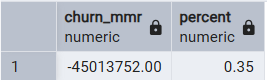

_Query complete 00:00:04.528_

From july to august:

In [ ]:
SELECT sum(august - july) AS Churn_MMR, ABS(ROUND(sum(j.august) / sum(august - july), 2)) AS percent
FROM 
(SELECT visitor_id, sum(price) AS july FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 7
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS august FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 8
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE m.july > j.august

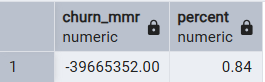

Query complete 00:00:04.852

From august to september:

In [ ]:
SELECT sum(september - august) AS Churn_MMR, ABS(ROUND(sum(j.september) / sum(september - august), 2)) AS percent
FROM 
(SELECT visitor_id, sum(price) AS august FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 8
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS september FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 9
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE m.august > j.september

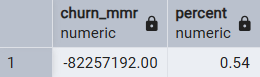

_Query complete 00:00:04.812_

##### Net MRR Growth

References:  
Chaffey, D. (2025, January 2). E-commerce conversion rate benchmarks - 2025 update. Smart Insights. https://www.smartinsights.com/ecommerce/ecommerce-analytics/ecommerce-conversion-rates/